<a href="https://colab.research.google.com/github/Jaquetti/Facial-parts-extractor/blob/main/CFFE_PARTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import dlib
from google.colab.patches import cv2_imshow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

git dlib 81 pontos:
https://github.com/codeniko/shape_predictor_81_face_landmarks

In [ ]:
#definindo o metodo para detectar face frontal
detector = dlib.get_frontal_face_detector()

#lendo o aruivo baixado do git hub
predictor = dlib.shape_predictor("../content/drive/My Drive/shape_predictor_81_face_landmarks.dat")


In [ ]:
#lendo o data set CFFE já préprocessado antes
X1 = np.load('../content/drive/My Drive/Estágio/CFFE__X.npy')
#y = np.load('../content/drive/My Drive/Estágio/CFFE__y.npy')

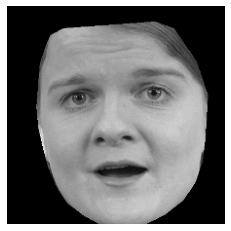

In [ ]:
#printando a imagem que iremos usar para teste
img = X1[0]
plt.axis('off')
plt.imshow(img, cmap='gray')


# **Foi testado usando apenas um bloco de código mas ocorreu um erro, pois as imagens estavam se subscrevendo não apresentando o resultado final desejado. Por este motivo se quebrou em 4 blocos cada qual para sua região específica**

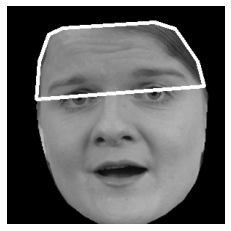

In [ ]:
"O código é o mesmo só ira mudar os pontos de landmarks utilizados"

#declarando lista
parte_testa = []
#definindo variável como nossa imagem teste
img = X1[0]
#resize na imagem
img = cv2.resize(img, (300, 300), interpolation = cv2.INTER_CUBIC) 
#criando uma máscara de zeros de mesmo tamanho que nossa imagem
mask = np.zeros_like(img)
#irá detectar a fáce
faces = detector(img)
#o laço for é se existir mais de uma face presente na imagem
for face in faces:
    #enviando imagem e sua respectiva localização
    landmarks = predictor(img, face)
    landmarks_points = []
    #nesta etapa pegamos as cordenadas x e y das landmarks e salvamos as mesmas em uma lista
    for n in range(0,81):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        landmarks_points.append((x, y))

    #transformando a lista em um np array
    points = np.array(landmarks_points, np.int32)
    
    #esta nova lista vai conter os pontos onde está presente apenas a testa
    testa = []
    for i in range(len(points)):
      if(i>=68):
        #salvando estes pontos
        testa.append(points[i])
    
    #transformando a lista em um np array
    testa = np.array(testa, np.int32)
    #criando um padrão convexo a partir destes pontos
    convexhull_testa = cv2.convexHull(testa)
    #aqui é desenhado o padrão convexo em nossa máscara
    cv2.fillConvexPoly(mask, convexhull_testa, 255)
    #merge da imagem e a máscara
    face1 = cv2.bitwise_and(img, img, mask=mask)
    #Cropoando parte significante
    x,y,w,h = cv2.boundingRect(mask)
    face1=face1[y:y+h, x:x+w]
    #fazendo apend em nossa lista (está é erapa só é necessária caso for implementado um laço for para todas as imagens)
    parte_testa.append(face1)
    #para fim ilustrativos, esta função desenha o padrão convexo citado acima na imagem
    cv2.polylines(img, [convexhull_testa], True, (255, 0, 0), 3)
#transformando a lista em um np array
parte_testa =  np.array(parte_testa)
#printando resultados
plt.axis('off')
plt.imshow(img, cmap='gray')

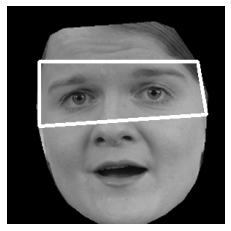

In [ ]:
"O código é o mesmo só ira mudar os pontos de landmarks utilizados"

parte_olho = []
c=0
img = X1[0]
img = cv2.resize(img, (300, 300), interpolation = cv2.INTER_CUBIC) 
mask = np.zeros_like(img)
faces = detector(img)
for face in faces:
    landmarks = predictor(img, face)
    landmarks_points = []
    for n in range(0,81):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        landmarks_points.append((x, y))

    points = np.array(landmarks_points, np.int32)
    olhos = [] 

    for i in range(len(points)):
      if(i==75 or i==1 or i==28 or i==15 or i==74):
        olhos.append(points[i])
      

    olhos = np.array(olhos, np.int32)
    convexhull_olhos = cv2.convexHull(olhos)
    cv2.fillConvexPoly(mask, convexhull_olhos, 255)
    face2 = cv2.bitwise_and(img, img, mask=mask)
    x,y,w,h = cv2.boundingRect(mask)
    face2=face2[y:y+h, x:x+w]
    parte_olho.append(face2)
    cv2.polylines(img, [convexhull_olhos], True, (255, 0, 0), 3)

parte_olho =  np.array(parte_olho)
plt.imshow(img)

plt.axis('off')
plt.imshow(img, cmap='gray')


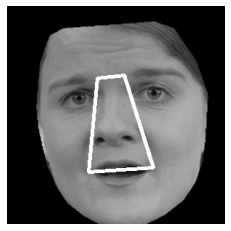

In [ ]:
"O código é o mesmo só ira mudar os pontos de landmarks utilizados"

parte_nariz = []
img = X1[0]

img = cv2.resize(img, (300, 300), interpolation = cv2.INTER_CUBIC) 
mask = np.zeros_like(img)
faces = detector(img)
for face in faces:
    landmarks = predictor(img, face)
    landmarks_points = []
    for n in range(0,81):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        landmarks_points.append((x, y))

    points = np.array(landmarks_points, np.int32)
    nariz = []
    
    for i in range(len(points)):
      if(i==21 or i==22 or i==48 or i==54):
        nariz.append(points[i])
      
    nariz = np.array(nariz, np.int32)
    convexhull_nariz = cv2.convexHull(nariz)
    cv2.fillConvexPoly(mask, convexhull_nariz, 255)
    face3 = cv2.bitwise_and(img, img, mask=mask)
    x,y,w,h = cv2.boundingRect(mask)
    face3=face3[y:y+h, x:x+w]
    parte_nariz.append(face3) 
    cv2.polylines(img, [convexhull_nariz], True, (255, 0, 0), 3)

parte_nariz =  np.array(parte_nariz)
plt.axis('off')
plt.imshow(img, cmap='gray')

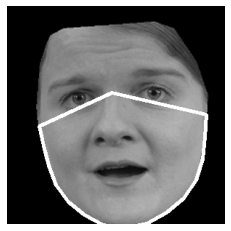

In [ ]:
"O código é o mesmo só ira mudar os pontos de landmarks utilizados"

parte_boca = []
img = X1[0]
img = cv2.resize(img, (300, 300), interpolation = cv2.INTER_CUBIC) 
mask = np.zeros_like(img)
faces = detector(img)
for face in faces:
    landmarks = predictor(img, face)
    landmarks_points = []
    for n in range(0,81):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        landmarks_points.append((x, y))

    points = np.array(landmarks_points, np.int32)
    boca = []

    for i in range(len(points)):
      #3, 30, 13 e 57, 
      if(i>=1 and i<=15 or i==27):
        boca.append(points[i])

    boca = np.array(boca, np.int32)
    convexhull_boca = cv2.convexHull(boca)
    cv2.fillConvexPoly(mask, convexhull_boca, 255)
    face4 = cv2.bitwise_and(img, img, mask=mask)
    x,y,w,h = cv2.boundingRect(mask)
    face4=face4[y:y+h, x:x+w]
    parte_boca.append(face4) 
    cv2.polylines(img, [convexhull_boca], True, (255, 0, 0), 3)

parte_boca =  np.array(parte_boca)
plt.axis('off')
plt.imshow(img, cmap='gray')

<Figure size 432x288 with 0 Axes>

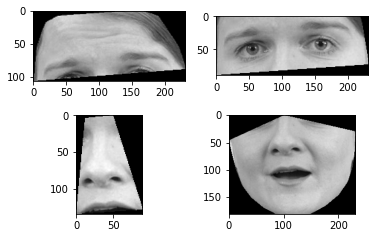

In [ ]:
plt.figure()

f, axarr = plt.subplots(2,2) 

axarr[0][0].imshow(parte_testa[0],cmap = 'gray')
axarr[0][1].imshow(parte_olho[0],cmap = 'gray')
axarr[1][0].imshow(parte_nariz[0],cmap = 'gray')
axarr[1][1].imshow(parte_boca[0],cmap = 'gray')
